In [4]:
pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.4/166.4 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 8.3 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105789 sha256=1514c95f9d431957c27f495013c0a1b13d8799b58dd886549f7663d128ab24c2
  Stored in directory: /home/jovyan/.cache/pip/wheels/14/e4/0d/a3409c4d5ec4fcc54cdd5713cacfcdcff6125e9d5392d7cd92
Successfully built kaggle
  Attempting uninstall: certifi
    Found existing installation: certifi 2022.12.7
    Uninstalling certifi-2022.12.7:
      Successfully uninstalled certifi-2022.12.7
Note: you may need to restart the kernel to use updated packages.


In [5]:
import os

# Set Kaggle dataset URL and output directory
dataset_url = "apollo2506/landuse-scene-classification"
output_dir = "landuse_scene_classification"

# Download the dataset using Kaggle API
os.system(f"kaggle datasets download -d {dataset_url} -p {output_dir} --unzip")

print(f"Dataset downloaded and extracted to: {output_dir}")

Dataset URL: https://www.kaggle.com/datasets/apollo2506/landuse-scene-classification
License(s): CC0-1.0


100%|██████████| 1.98G/1.98G [00:21<00:00, 98.3MB/s]



Dataset downloaded and extracted to: landuse_scene_classification


In [38]:
print(type(df['Label']))

<class 'pandas.core.series.Series'>


In [43]:
df['Label'].unique().sort()

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = "landuse_scene_classification/train.csv"  # Replace with the actual file path
df = pd.read_csv(data_path)

# Display the first few rows
print("Initial Dataset:")
print(df.head())

# Check basic information about the dataset
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nDuplicate Rows:")
print(df.duplicated().sum())

Initial Dataset:
   Unnamed: 0                              Filename  Label     ClassName
0        5818              runway/runway_000259.png     16        runway
1        1327  intersection/intersection_000348.png     10  intersection
2        2529  agricultural/agricultural_000025.png      0  agricultural
3        3865        chaparral/chaparral_000195.png      5     chaparral
4        2024          airplane/airplane_000260.png      1      airplane

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7350 entries, 0 to 7349
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7350 non-null   int64 
 1   Filename    7350 non-null   object
 2   Label       7350 non-null   int64 
 3   ClassName   7350 non-null   object
dtypes: int64(2), object(2)
memory usage: 229.8+ KB
None

Missing Values:
Unnamed: 0    0
Filename      0
Label         0
ClassName     0
dtype: int64

Duplicate Rows:
0


In [51]:
df['Label'].unique()

array([16, 10,  0,  5,  1, 18, 19, 13, 20,  4, 11,  2,  9,  8, 17, 15, 12,
        7,  3, 14,  6])

In [45]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
        Unnamed: 0        Label
count  7350.000000  7350.000000
mean   3674.500000    10.000000
std    2121.906572     6.055713
min       0.000000     0.000000
25%    1837.250000     5.000000
50%    3674.500000    10.000000
75%    5511.750000    15.000000
max    7349.000000    20.000000


/tmp/ipykernel_139/2941052269.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


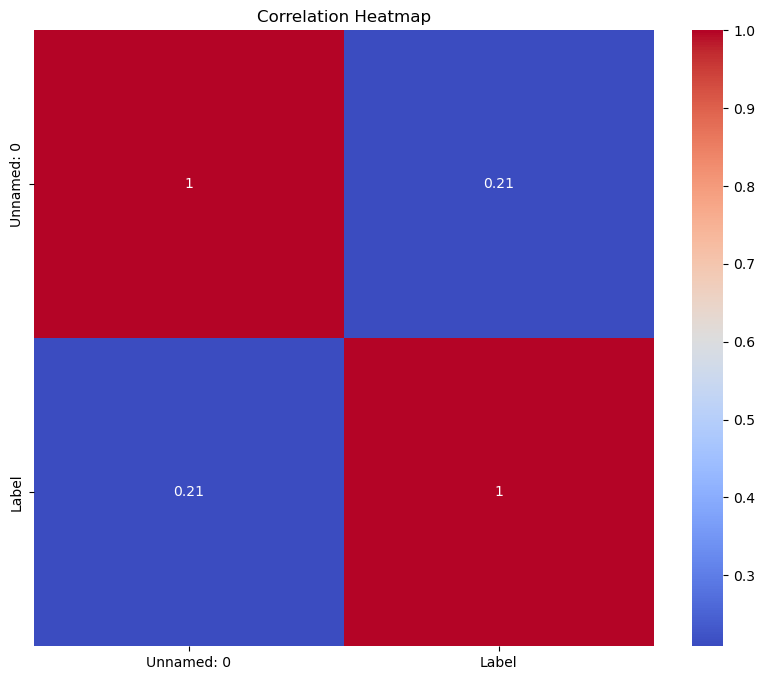

In [46]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [47]:
# Drop rows with missing target values
df = df.dropna(subset=['ClassName'])

# Fill missing numerical values with the median
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill missing categorical values with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


Missing Values After Cleaning:
Unnamed: 0    0
Filename      0
Label         0
ClassName     0
dtype: int64


In [48]:
# Remove duplicate rows
df = df.drop_duplicates()
print("\nDuplicate Rows After Cleaning:")
print(df.duplicated().sum())


Duplicate Rows After Cleaning:
0


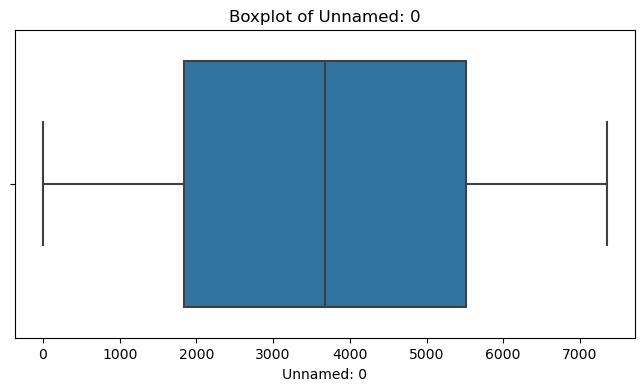

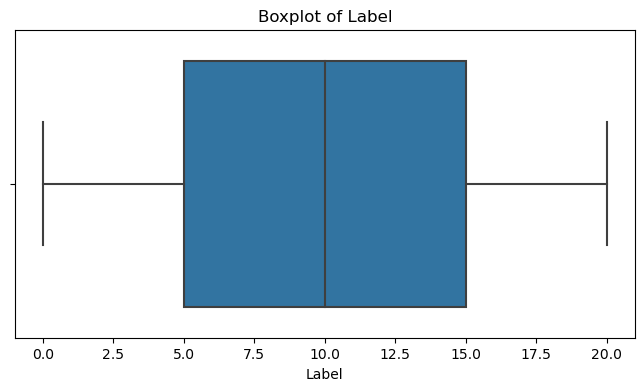


Dataset Shape After Removing Outliers:
(7350, 4)


In [49]:
# Visualize outliers
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot of {col}")
    plt.show()

# Remove outliers using the IQR method
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("\nDataset Shape After Removing Outliers:")
print(df.shape)

In [19]:
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())

print("\nDuplicate Rows After Cleaning:")
print(df.duplicated().sum())


Missing Values After Cleaning:
Unnamed: 0    0
Filename      0
Label         0
ClassName     0
dtype: int64

Duplicate Rows After Cleaning:
0


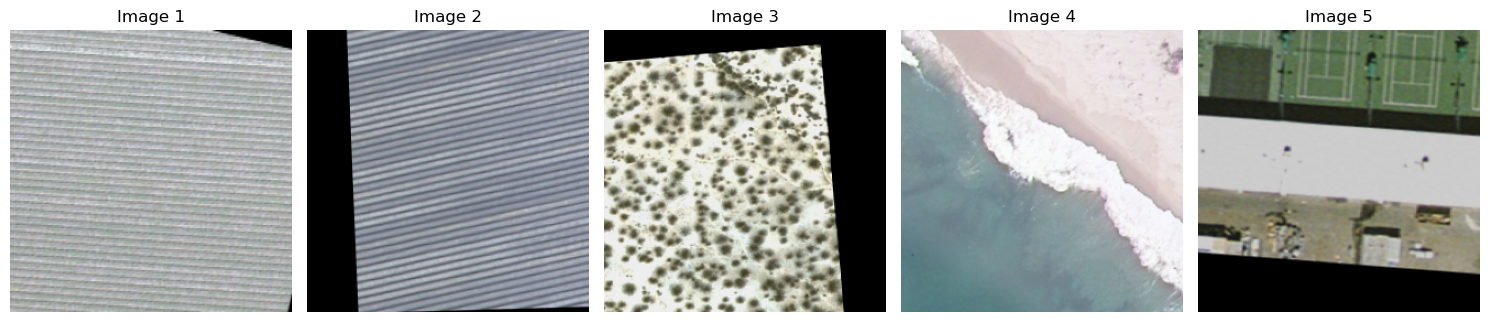

In [112]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Path to the dataset folder (update this to your dataset's folder path)
dataset_path = "landuse_scene_classification/images"  # Replace with the actual path

# Get a list of all image files in the dataset
image_files = []
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg')):  # Include common image formats
            image_files.append(os.path.join(root, file))

# Randomly select 5 images to display
random_images = random.sample(image_files, 5)

# Display the random images
plt.figure(figsize=(15, 10))
for i, image_path in enumerate(random_images):
    img = Image.open(image_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(f"Image {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [113]:
# Save the cleaned dataset
cleaned_data_path = "cleaned_landuse_scene_classification.csv"
df.to_csv(cleaned_data_path, index=False)
print(f"Cleaned dataset saved to {cleaned_data_path}")

Cleaned dataset saved to cleaned_landuse_scene_classification.csv


In [114]:
df.head()

,Filename,Label,ClassName
Id,,,
5818,runway/runway_000259.png,16,runway
1327,intersection/intersection_000348.png,10,intersection
2529,agricultural/agricultural_000025.png,0,agricultural
3865,chaparral/chaparral_000195.png,5,chaparral
2024,airplane/airplane_000260.png,1,airplane


In [115]:
df.columns

Index(['Filename', 'Label', 'ClassName'], dtype='object')

In [84]:
df.rename(columns={'serial': 'Id'})

In [89]:
df.sort_values(by='Id', ascending=True)

,Id,Filename,Label,ClassName
6196,0,beach/beach_000172.png,3,beach
4061,1,beach/beach_000107.png,3,beach
3571,2,beach/beach_000298.png,3,beach
3017,3,beach/beach_000053.png,3,beach
1385,4,beach/beach_000018.png,3,beach
...,...,...,...,...
7217,7345,denseresidential/denseresidential_000492.png,6,denseresidential
981,7346,denseresidential/denseresidential_000057.png,6,denseresidential
2699,7347,denseresidential/denseresidential_000167.png,6,denseresidential
1376,7348,denseresidential/denseresidential_000434.png,6,denseresidential


In [94]:
df.set_index('Id', inplace=True)

In [96]:
df

,Filename,Label,ClassName
Id,,,
5818,runway/runway_000259.png,16,runway
1327,intersection/intersection_000348.png,10,intersection
2529,agricultural/agricultural_000025.png,0,agricultural
3865,chaparral/chaparral_000195.png,5,chaparral
2024,airplane/airplane_000260.png,1,airplane
...,...,...,...
779,mobilehomepark/mobilehomepark_000090.png,12,mobilehomepark
6148,parkinglot/parkinglot_000386.png,14,parkinglot
1453,freeway/freeway_000235.png,8,freeway


In [97]:
df_cleaned = df.drop(axis=0, columns='Label')
df_cleaned.head()

,Filename,ClassName
Id,,
5818,runway/runway_000259.png,runway
1327,intersection/intersection_000348.png,intersection
2529,agricultural/agricultural_000025.png,agricultural
3865,chaparral/chaparral_000195.png,chaparral
2024,airplane/airplane_000260.png,airplane


In [101]:
df_cleaned.sort_values(by="Id", inplace=True)

In [102]:
df_cleaned

,Filename,ClassName
Id,,
0,beach/beach_000172.png,beach
1,beach/beach_000107.png,beach
2,beach/beach_000298.png,beach
3,beach/beach_000053.png,beach
4,beach/beach_000018.png,beach
...,...,...
7345,denseresidential/denseresidential_000492.png,denseresidential
7346,denseresidential/denseresidential_000057.png,denseresidential
7347,denseresidential/denseresidential_000167.png,denseresidential


In [104]:
df_cleaned.shape

(7350, 2)

In [109]:

df_nan = pd.DataFrame(df_cleaned)

# Sort by 'ID' with NaN values at the beginning
df_sorted_nan = df_nan.sort_values(by='Id', na_position='first')

print("\nDataFrame sorted by 'ID' with NaN values at the beginning:")
print(df_sorted_nan)


DataFrame sorted by 'ID' with NaN values at the beginning:
                                          Filename         ClassName
Id                                                                  
0                           beach/beach_000172.png             beach
1                           beach/beach_000107.png             beach
2                           beach/beach_000298.png             beach
3                           beach/beach_000053.png             beach
4                           beach/beach_000018.png             beach
...                                            ...               ...
7345  denseresidential/denseresidential_000492.png  denseresidential
7346  denseresidential/denseresidential_000057.png  denseresidential
7347  denseresidential/denseresidential_000167.png  denseresidential
7348  denseresidential/denseresidential_000434.png  denseresidential
7349  denseresidential/denseresidential_000468.png  denseresidential

[7350 rows x 2 columns]


##### So I dint find any NaN on Null  or missing values in the datframe.

In [111]:
import pandas as pd
import seaborn as sns

# Example: Class labels and counts
data = {'class': ['Class A', 'Class B', 'Class C'], 'count': [500, 300, 200]}
df = pd.DataFrame(data)

# Bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='class', y='count', palette='viridis')
plt.title("Class Distribution", fontsize=16)
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'path_to_image_folder'